## EIGEN FACE EDA

In [19]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np

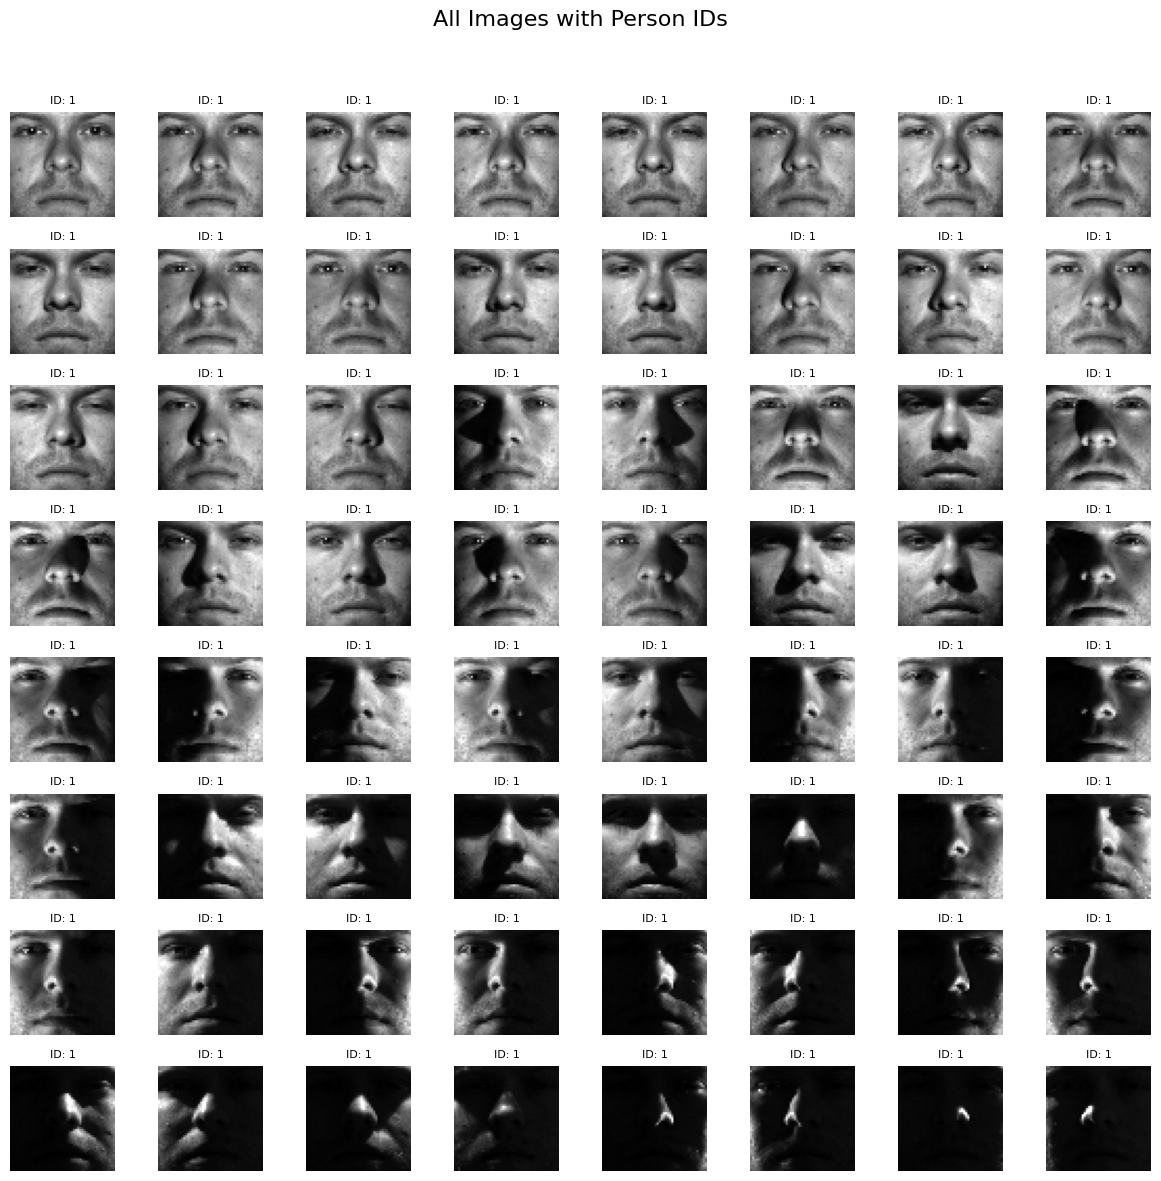

In [20]:
### Data loading and plotting the image ###
data = loadmat('face_data.mat')
# Access the cell arrays
images = data['image']  # This is a cell array of images
person_ids = data['personID']  # Person identifiers (1-10)
subset_ids = data['subsetID']  # Subset identifiers (1-5)



n_samples = images.shape[1]  # Number of images
img_height, img_width = 50, 50  # Image dimensions
input_data = np.zeros((n_samples, img_height * img_width))

for i in range(n_samples):
    # Extract the image from the cell array and flatten it
    img = images[0, i]  # Access image i
    input_data[i, :] = img.flatten()  # Flatten the 50x50 image to a 2500-d vector




image = data['image'][0]
person_id = data['personID'][0]

fig, axes = plt.subplots(8, 8, figsize=(12, 12))  # Create an 8x8 grid of subplots
fig.suptitle("All Images with Person IDs", fontsize=16)

for i in range(8):
    for j in range(8):
        idx = i * 8 + j  # Calculate the index of the image
        axes[i, j].imshow(image[idx], cmap='gray')  # Display the image
        axes[i, j].set_title(f"ID: {person_id[idx]}", fontsize=8)  # Set the title with person ID
        axes[i, j].axis('off')  # Turn off the axes for better visualization

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()

### IMPLEMENTING PCA

In [21]:
def pca_fun(input_data, target_d):
    """
    Implement PCA to extract the principal components
    
    Parameters:
    input_data -- Data matrix, each row is a sample
    target_d -- Target dimensionality (number of principal components to keep)
    
    Returns:
    P -- d x target_d matrix containing target_d eigenvectors
    """
    # Step 1: Center the data by subtracting the mean of each feature
    mean_vector = np.mean(input_data, axis=0)
    centered_data = input_data - mean_vector
    
    # Step 2: Compute the covariance matrix
    # For numerical stability, use the fact that cov(X) = (X^T * X) / (n-1)
    n_samples = input_data.shape[0]
    cov_matrix = np.dot(centered_data.T, centered_data) / (n_samples - 1)
    
    # Step 3: Compute eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Step 4: Sort eigenvalues in descending order and reorder eigenvectors
    idx = np.argsort(eigenvalues)[::-1]  # Get indices for sorting in descending order
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Step 5: Select the top target_d eigenvectors
    P = eigenvectors[:, :target_d]
    
    return P

### COMPUTING EIGEN FACES

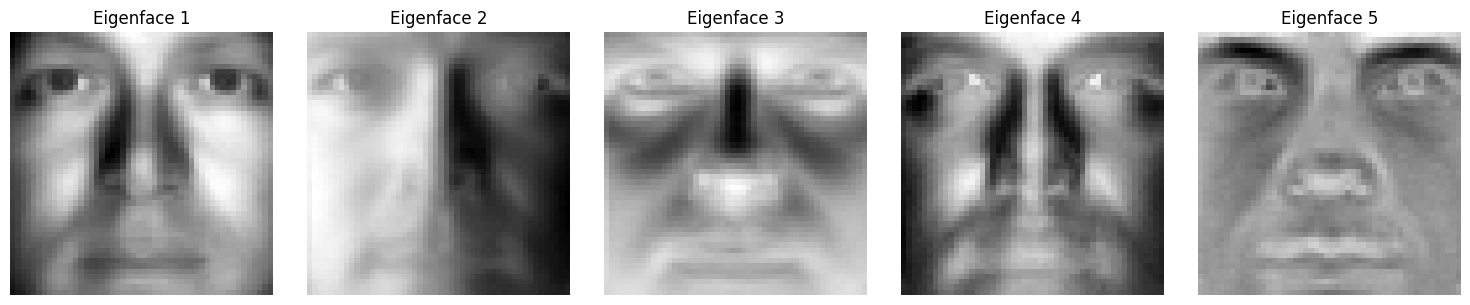

In [23]:
# Display and save top 5 eigenfaces
target_d = 200  # Target dimensionality
P = pca_fun(input_data, target_d)

plt.figure(figsize=(15, 3))
for i in range(5):  # Display top 5 eigenfaces
    plt.subplot(1, 5, i+1)
    # Reshape the eigenvector back to an image
    eigenface = P[:, i].reshape(img_height, img_width)
    plt.imshow(eigenface, cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')
plt.tight_layout()

# Save the figure before showing it
plt.savefig('top_5_eigenfaces.png', dpi=300, bbox_inches='tight')
plt.show()